In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import seaborn.objects as so

from scipy.stats import f_oneway
from scipy.stats import ttest_ind

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.express as px
import plotly.graph_objects as go
from matplotlib import colors as mcolors
import math

from xlutils.copy import copy  # For modifying .xls files
import xlrd
import xlwt

import statistics

In [15]:
file_path = '/Users/taofeek/Documents/Python/Mobile Biometrics Project/Project/results_voice.csv'

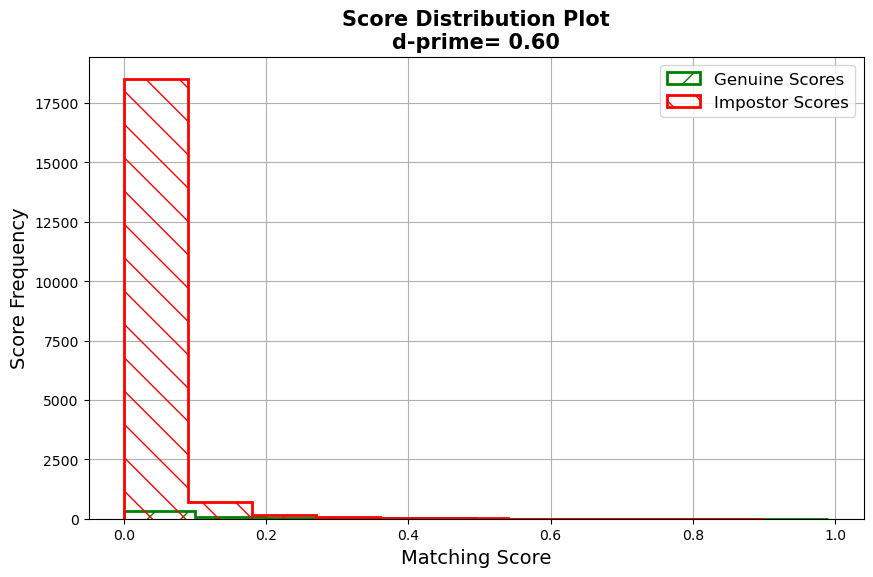

0.1946153846153846

In [33]:
df = pd.read_csv(file_path)
# Step 1: Initialize lists to hold scores
genuine_scores = []
impostor_scores = []
all_scores = []
# Step 2: Extract column labels for scores (assuming they are numerical)
score_columns = df.columns[2:]  # From the third column onwards
# Step 3: Classify scores as genuine or impostor
for index, row in df.iterrows():
    actual_user = int(row['True Label'])  # Convert actual user to integer (label)
    predicted_user = int(row['Predicted Label'])  # Convert predicted user to integer (label)
    
    # Genuine score: Score in the column corresponding to the actual user
    genuine_score = row[str(actual_user)]
    genuine_scores.append(genuine_score)
    all_scores.append(genuine_score)
    
    # Impostor scores: All other scores in the row
    for column in score_columns:
        if int(column) != actual_user:  # Skip the column for the genuine score
            impostor_scores.append(row[column])
            all_scores.append(row[column])


epsilon = 1e-12

mean_genuine = np.mean(genuine_scores)
mean_impostor = np.mean(impostor_scores)
std_genuine = np.std(genuine_scores)
std_impostor = np.std(impostor_scores)
        
d_prime = (mean_genuine - mean_impostor) / np.sqrt((std_genuine**2 + std_impostor**2) + epsilon)

# Step 4: Plot the distributions with Matplotlib
# Create a figure
plt.figure(figsize=(10, 6))

# Histogram for genuine scores
plt.hist(
    genuine_scores, lw=2, histtype='step', color='green', label='Genuine Scores', hatch="/"
)

# Histogram for impostor scores
plt.hist(
    impostor_scores, lw=2, histtype='step', color='red', label='Impostor Scores', hatch="\\"
)
# Add titles and labels
plt.title("Score Distribution Plot for Voice Dataset\nd-prime= %.2f" % 
                  (d_prime),
                  fontsize=15,
                  weight="bold")
plt.xlabel('Matching Score', fontsize=14)
plt.ylabel('Score Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

#save plot
plt.savefig("SDP_Voice.png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()
#close the plot
plt.close()
# Convert list to a NumPy array
genuine_scores_array = np.array(genuine_scores)
impostor_scores_array = np.array(impostor_scores)
# Initialize TPR, FPR and FNR lists
TPR, FNR, FPR = [],[],[]

thresholds = np.linspace(min(all_scores), max(all_scores), 100)

# Calculate FAR and FRR at each threshold
for threshold in thresholds:
    tp = np.sum(genuine_scores_array>=threshold)
    fn = np.sum(genuine_scores_array<threshold)
    fp = np.sum(impostor_scores_array>=threshold)
    tn = np.sum(impostor_scores_array<threshold)

    FPR.append(fp/(fp+tn+epsilon))
    FNR.append(fn/(tp+fn+epsilon))
    TPR.append(tp/(tp+fn+epsilon))

EER = FPR[np.nanargmin(np.absolute((np.array(FPR)-np.array(FNR))))]
EER

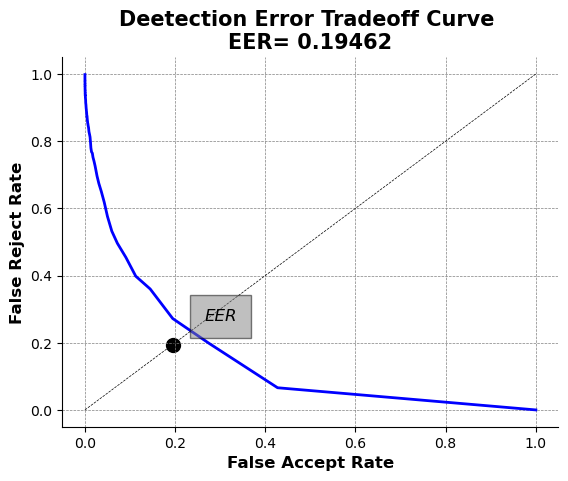

In [29]:
plt.figure()
plt.plot(FPR, FNR, lw=2, color='blue')

plt.text(EER +0.07,EER+0.07,"EER",style='italic', fontsize=12, bbox={"facecolor":"grey","alpha":0.5,"pad":10})
plt.plot([0,1],[0,1],"--",lw=0.5,color="black")
plt.scatter([EER], [EER], c='black', s=100)

plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.grid(color="gray",linestyle="--", linewidth=0.5)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.xlabel("False Accept Rate", fontsize=12, weight="bold")
plt.ylabel("False Reject Rate", fontsize=12, weight="bold")

plt.title("Detection Error Tradeoff Curve for Voice Dataset\nEER= %.5f" % (EER),fontsize=15, weight="bold")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#save plot
plt.savefig("DET_Voice.png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()
#close the plot
plt.close()

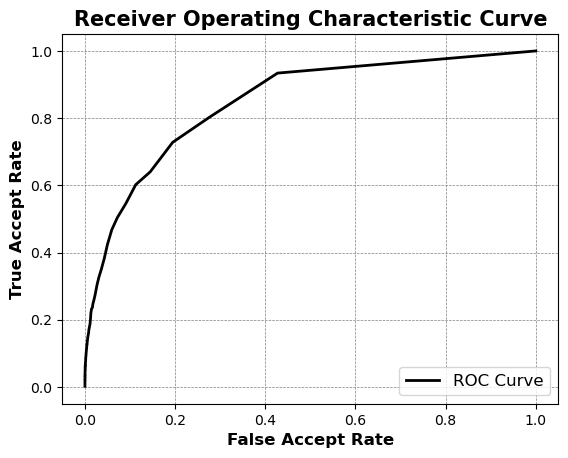

In [31]:
plt.figure()
plt.plot(FPR, TPR, lw=2, color = "black", label="ROC Curve")
# plt.plot([0,1],[0,1],"--", color="grey")

plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel("False Accept Rate", fontsize=12, weight="bold")
plt.ylabel("True Accept Rate", fontsize=12, weight="bold")

plt.title("Receiver Operating Characteristic Curve for Voice Dataset",fontsize=15, weight="bold")

plt.legend(loc="lower right", fontsize=12)
plt.grid(color="gray", linestyle="--", linewidth=0.5)

#save plot
plt.savefig("ROC_Voice.png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()
#close the plot
plt.close()